In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
import cv2

In [3]:
data = pd.read_csv('content/train.csv')
data.shape

(7095, 3)

In [4]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


3    5150
1     897
4     801
2     247
Name: ClassId, dtype: int64

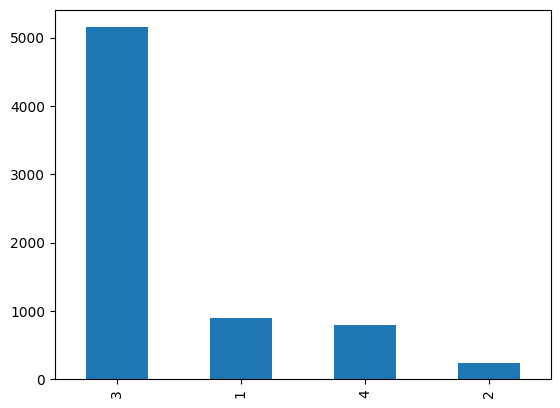

In [5]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

In [7]:
l1=[]
l2=[]
for img,ClassId,EncodedPixels in tqdm(data.values):
    image=cv2.imread("C://seversteel/content/train_images/{}".format(img),cv2.IMREAD_COLOR)
    image=cv2.resize(image,(120,120))
    l1.append(image)
    l2.append(ClassId)

100%|██████████| 7095/7095 [00:27<00:00, 261.63it/s]


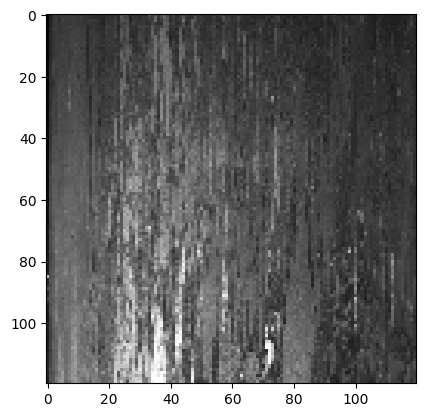

In [8]:
i = 15
plt.imshow(l1[i])

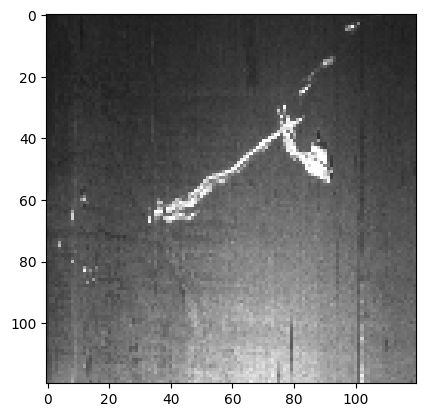

In [9]:
i = 16
plt.imshow(l1[i])

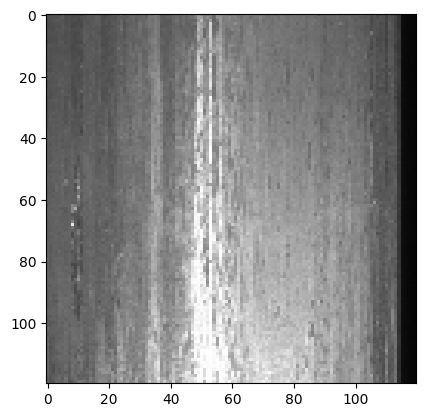

In [10]:
i = 90
plt.imshow(l1[i])

In [11]:
encoder = LabelEncoder()

X= np.array(l1)
X = X/255

y = encoder.fit_transform(l2)
y = np.array(y)

In [12]:
X.shape

(7095, 120, 120, 3)

In [14]:
y.shape

(7095,)

In [16]:
from imblearn.over_sampling import RandomOverSampler
reshaped_X = X.reshape(X.shape[0],-1)
oversample = RandomOverSampler(sampling_strategy='not majority')
X, y  = oversample.fit_resample(reshaped_X , y)
X = X.reshape(-1,120,120,3)

In [17]:
X.shape

(20600, 120, 120, 3)

In [18]:
y = to_categorical(y)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [20]:
print("x_train размер:",X_train.shape)
print("x_test размер:",X_test.shape)
print("y_train размер:",y_train.shape)
print("y_test размер:",y_test.shape)

x_train размер: (16480, 120, 120, 3)
x_test размер: (4120, 120, 120, 3)
y_train размер: (16480, 4)
y_test размер: (4120, 4)


In [21]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(Flatten())
model.add(Dense(4,activation="softmax"))

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [23]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10


129/129 [==============================] - 17s 118ms/step - loss: 1.4781 - accuracy: 0.6008 - val_loss: 0.6399 - val_accuracy: 0.7546
Epoch 2/10
129/129 [==============================] - 15s 113ms/step - loss: 0.5315 - accuracy: 0.8065 - val_loss: 0.5187 - val_accuracy: 0.7845
Epoch 3/10
129/129 [==============================] - 15s 117ms/step - loss: 0.3635 - accuracy: 0.8828 - val_loss: 0.3675 - val_accuracy: 0.8905
Epoch 4/10
129/129 [==============================] - 15s 115ms/step - loss: 0.2797 - accuracy: 0.9189 - val_loss: 0.3483 - val_accuracy: 0.8925
Epoch 5/10
129/129 [==============================] - 13s 103ms/step - loss: 0.2247 - accuracy: 0.9385 - val_loss: 0.3076 - val_accuracy: 0.9053
Epoch 6/10
129/129 [==============================] - 13s 101ms/step - loss: 0.2002 - accuracy: 0.9476 - val_loss: 0.2736 - val_accuracy: 0.9255
Epoch 7/10
129/129 [==============================] - 13s 102ms/step - loss: 0.1808 - accuracy: 0.9513 - val_loss: 0.2847 - val_

<Axes: title={'center': 'Loss curve'}>

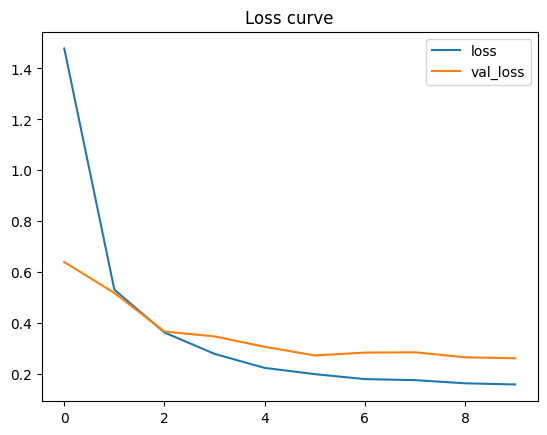

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

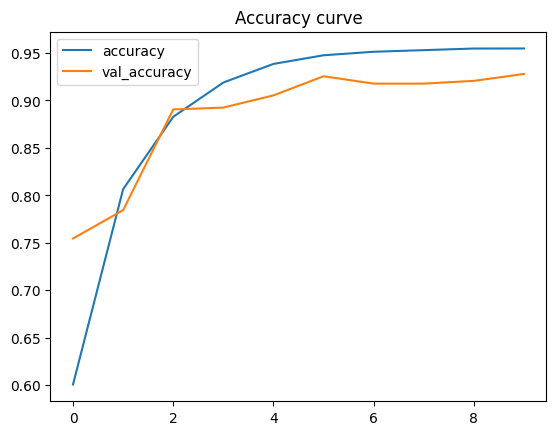

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [26]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [27]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [28]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
129/129 [==============================] - 22s 170ms/step - loss: 0.9019 - accuracy: 0.6538 - val_loss: 0.6007 - val_accuracy: 0.7755
Epoch 2/10
129/129 [==============================] - 20s 159ms/step - loss: 0.5080 - accuracy: 0.8141 - val_loss: 0.4498 - val_accuracy: 0.8359
Epoch 3/10
129/129 [==============================] - 20s 152ms/step - loss: 0.3814 - accuracy: 0.8647 - val_loss: 0.3673 - val_accuracy: 0.8716
Epoch 4/10
129/129 [==============================] - 20s 153ms/step - loss: 0.2943 - accuracy: 0.9015 - val_loss: 0.3496 - val_accuracy: 0.8871
Epoch 5/10
129/129 [==============================] - 20s 153ms/step - loss: 0.2445 - accuracy: 0.9209 - val_loss: 0.3213 - val_accuracy: 0.8983
Epoch 6/10
129/129 [==============================] - 19s 151ms/step - loss: 0.2118 - accuracy: 0.9354 - val_loss: 0.3264 - val_accuracy: 0.9027
Epoch 7/10
129/129 [==============================] - 20s 157ms/step - loss: 0.1932 - accuracy: 0.9428 - val_loss: 0.3095 - val_ac

<Axes: title={'center': 'Loss curve'}>

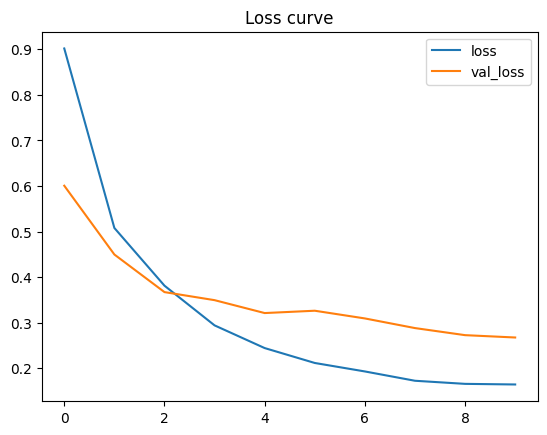

In [29]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

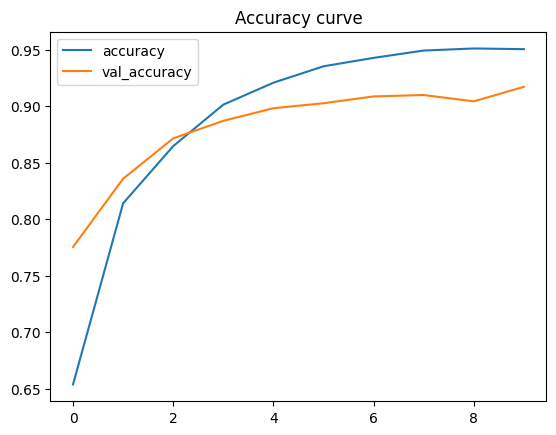

In [30]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [31]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [32]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [33]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/10
129/129 [==============================] - 21s 158ms/step - loss: 0.9818 - accuracy: 0.5526 - val_loss: 0.7895 - val_accuracy: 0.6769
Epoch 2/10
129/129 [==============================] - 19s 147ms/step - loss: 0.7869 - accuracy: 0.6760 - val_loss: 0.6960 - val_accuracy: 0.7201
Epoch 3/10
129/129 [==============================] - 19s 149ms/step - loss: 0.7128 - accuracy: 0.7061 - val_loss: 0.6098 - val_accuracy: 0.7650
Epoch 4/10
129/129 [==============================] - 19s 145ms/step - loss: 0.6282 - accuracy: 0.7530 - val_loss: 0.5688 - val_accuracy: 0.7888
Epoch 5/10
129/129 [==============================] - 19s 150ms/step - loss: 0.5637 - accuracy: 0.7825 - val_loss: 0.4965 - val_accuracy: 0.8141
Epoch 6/10
129/129 [==============================] - 20s 153ms/step - loss: 0.4978 - accuracy: 0.8121 - val_loss: 0.4638 - val_accuracy: 0.8262
Epoch 7/10
129/129 [==============================] - 18s 142ms/step - loss: 0.4551 - accuracy: 0.8300 - val_loss: 0.4172 - val_ac

<Axes: title={'center': 'Loss curve'}>

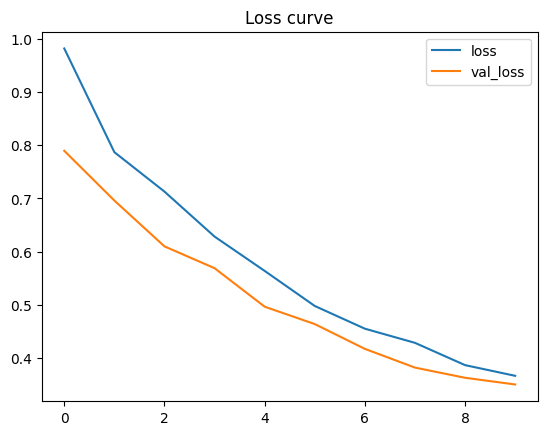

In [34]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

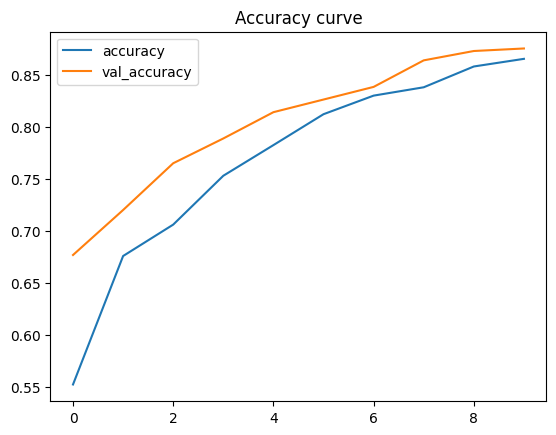

In [35]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [36]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

129/129 [==============================] - 2s 12ms/step - loss: 0.3503 - accuracy: 0.8752
[+] Accuracy: 87.52%


In [37]:
from keras.models import Model
model.save('my_model_steel.keras')

In [41]:
from keras.models import load_model

loaded_model = load_model('my_model_steel.keras')

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 39, 39, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 64)         

In [44]:
l2[:3]

[1, 3, 1]

In [45]:
X= np.array(l1[:3])
X = X/255

y = encoder.fit_transform(l2[:3])
y = np.array(y)

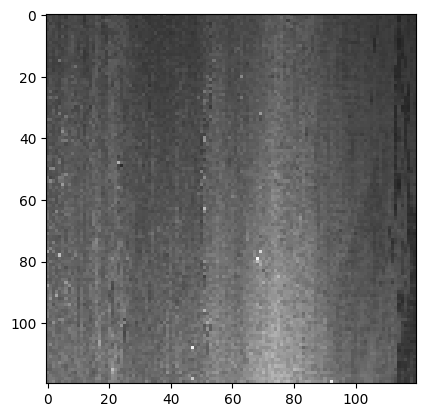

In [46]:
plt.imshow(l1[0]);

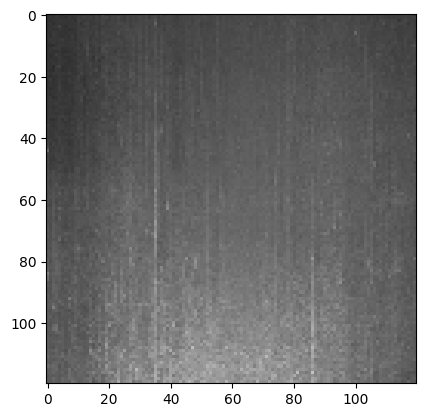

In [47]:
plt.imshow(l1[1]);

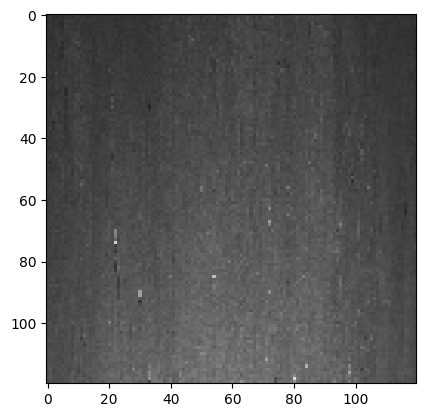

In [48]:
plt.imshow(l1[2]);

In [49]:
y =  to_categorical(y)
y

array([[1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [50]:
predictions = model.predict(X)
predictions

1/1 [==============================] - 0s 88ms/step


array([[9.6950477e-01, 9.3291324e-05, 3.0175136e-02, 2.2688055e-04],
       [9.2095613e-01, 3.1258189e-04, 7.7441208e-02, 1.2900676e-03],
       [9.4862187e-01, 3.6339066e-03, 4.5019988e-02, 2.7243102e-03]],
      dtype=float32)

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 39, 39, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 2, 64)         